In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize


dat_path = os.getcwd() + "/figure_data/"
fig_path = os.getcwd() + "/figures/"

text_font = 20

In [2]:
def axis_decor(ax, text_font, major_length, minor_length, linewidth):

	ax.spines['top'].set_linewidth(0)
	ax.spines['right'].set_linewidth(0)
	ax.spines['bottom'].set_linewidth(linewidth)
	ax.spines['left'].set_linewidth(linewidth)

	ax.tick_params(axis='both', which='major', labelsize=text_font, length=major_length, width=linewidth)
	ax.tick_params(axis='both', which='minor', labelsize=text_font, length=minor_length, width=linewidth)

In [3]:
num_plrs = 1500

Rp, Sp, Tp, Pp = 1.0, -0.1, 1.1, 0.0
Wh = 0.7

kp = 4
kh = 2
wf = np.round(1/(kp+kh),3)

rho_pi = 0.5
rho_hi = 0.5

overlap_list = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
p_error_list = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
Gh_list = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1]

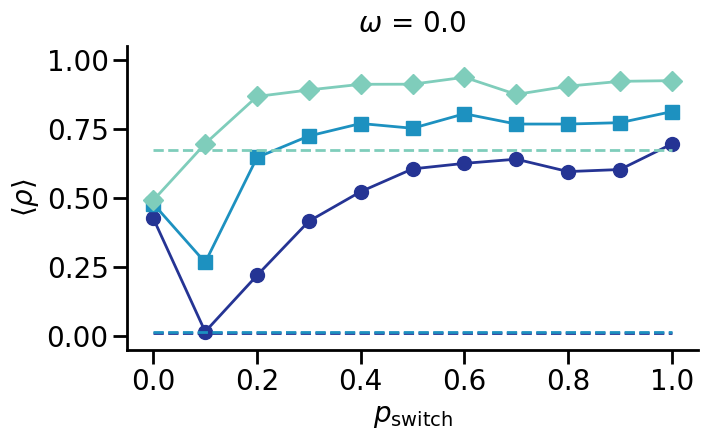

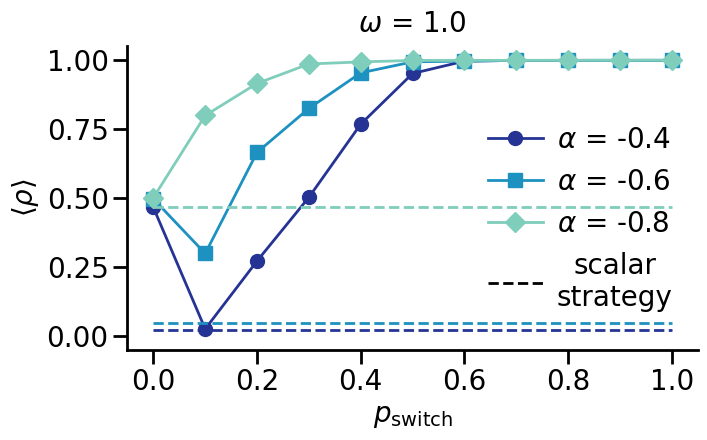

In [4]:
def figure2(overlap):

	fig, ax = plt.subplots(1,1, figsize=(7,4.5))

	new_Gh_list = [1.1, 1.3, 1.5]
	a_list = [np.round(Wh-Gh, 2) for Gh in new_Gh_list]
	
	markers = ['o', 's', 'D']
	colors = ['#253494', '#1d91c0', '#7fcdbb']

	compare_dat= np.loadtxt(dat_path+ f"fig2_v2_monolayer_comparison_overlap_{overlap}.txt")

	for ind, Gh in enumerate(new_Gh_list):

		plot_dat = []

		for p_error in p_error_list:

			dat = np.load(dat_path + f"/RR-averaged_coop_N_{num_plrs}_kp_{kp}_kh_{kh}_overlap_{overlap}_Rp_{Rp}_Sp_{Sp}_Tp_{Tp}_Pp_{Pp}_Gh_{Gh}_Wh_{Wh}_wf_{wf}_rho_pi_{rho_pi}_rho_hi_{rho_hi}_p_error_{p_error}.npy")

			coop_level = 0.5*np.mean(dat[0,:]+dat[1,:])/num_plrs
			plot_dat.append(coop_level)


		ax.plot(p_error_list, plot_dat, color=colors[ind], linewidth=2, label=rf'$\alpha$ = {a_list[ind]}', marker=markers[ind], markersize=10)
		ax.hlines(np.average(compare_dat[ind]), 0, 1, color=colors[ind], linestyle='dashed', linewidth=2)

	ax.hlines(0.5, 0, 0, color='black', linestyle='dashed', linewidth=2, label='scalar\nstrategy')
	
	ax.set_xlabel(r'$p_{\text{switch}}$', fontsize=text_font)
	ax.set_ylabel(r'$\langle \rho \rangle$', fontsize=text_font)

	ax.set_xlim(-0.05, 1.05)
	ax.set_ylim(-0.05, 1.05)

	axis_decor(ax, text_font, 10, 5, 2)

	ax.set_title(rf"$\omega$ = {overlap}", fontsize=text_font, pad=10)
	if overlap == 1.0:
		legend=ax.legend(fontsize=text_font, frameon=False, loc = 'center right', bbox_to_anchor=(1, 0.43), handlelength=2, handletextpad=0.5)

		for t in legend.texts:
			t.set_multialignment('center')

	plt.tight_layout()
	plt.savefig(fig_path + f"/fig2_v4_p_switch_trend_overlap_{overlap}.png", dpi=300, format='png', bbox_inches='tight')
	plt.show()
	plt.close()


figure2(overlap=0.0)
figure2(overlap=1.0)

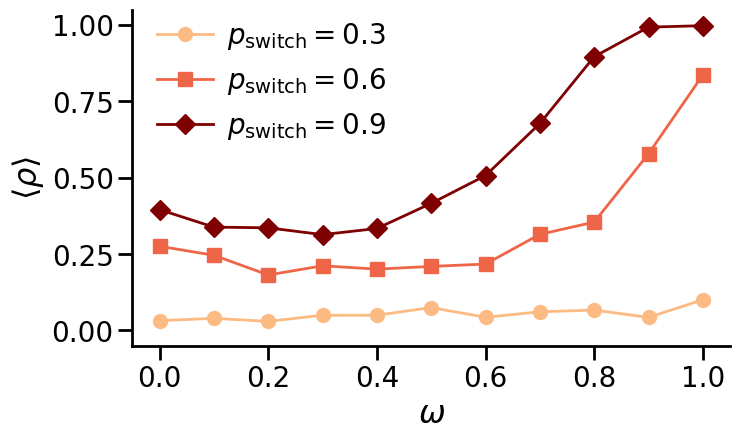

In [5]:
def figure3a(Gh):

	fig, ax = plt.subplots(1, 1, figsize=(7.5, 4.5))

	new_perror_list = [0.3, 0.6, 0.9]

	color_list = ['#fdbb84','#ef6548','#7f0000']
	marker_list = ['o', 's', 'D']

	for ind, p_error in enumerate(new_perror_list):

		plot_dat = []

		for overlap in overlap_list:

			dat = np.load(dat_path + f"/RR-averaged_coop_N_{num_plrs}_kp_{kp}_kh_{kh}_overlap_{overlap}_Rp_{Rp}_Sp_{Sp}_Tp_{Tp}_Pp_{Pp}_Gh_{Gh}_Wh_{Wh}_wf_{wf}_rho_pi_{rho_pi}_rho_hi_{rho_hi}_p_error_{p_error}.npy")

			coop_level = 0.5*np.mean(dat[0,:]+dat[1,:])/num_plrs
			plot_dat.append(coop_level)


		ax.plot(overlap_list, plot_dat, label=rf"$p_{{\text{{switch}}}} = {p_error}$", linewidth=2, color = color_list[ind], marker=marker_list[ind], markersize=10)


	ax.set_yticks(np.linspace(0, 1, 5))

	ax.set_ylim(-0.05, 1.05)
	ax.set_xlim(-0.05, 1.05)

	ax.set_ylabel(r"$\langle \rho \rangle$", fontsize=text_font+3)
	ax.set_xlabel(r"$\omega$", fontsize=text_font+3)

	axis_decor(ax, text_font, 10, 5, 2)

	ax.legend(fontsize=text_font, loc='upper left', ncols = 1, frameon=False, bbox_to_anchor=(0, 0.94, 1.0, 0.102),columnspacing=0.5, handletextpad=0.5)


	plt.tight_layout()
	plt.savefig(f"{fig_path}/fig3a_v4_overlap_trend_pswitch.png", dpi=300, bbox_inches='tight', format='png')
	plt.show()



figure3a(Gh=0.8)

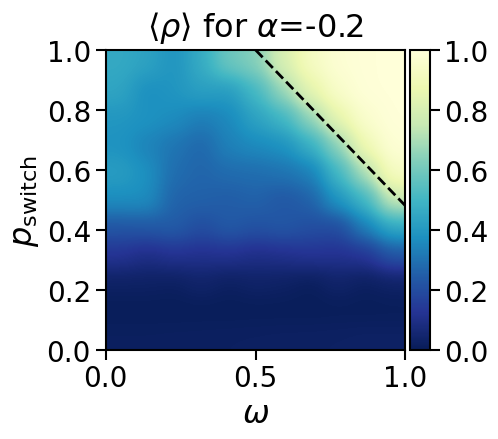

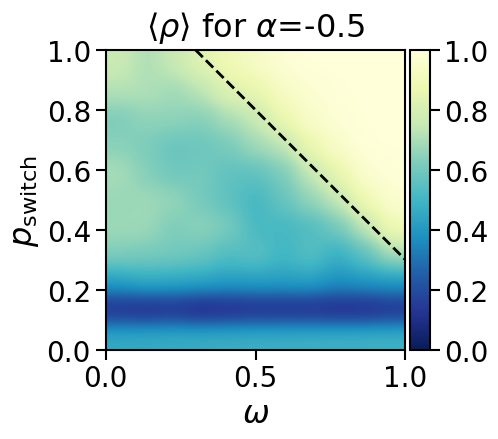

In [6]:
def figure3b(Gh, colormap):

	fig, ax = plt.subplots(1,1, figsize=(5.5,4.5))

	plot_dat = np.zeros((len(overlap_list), len(p_error_list)))

	for o, overlap in enumerate(overlap_list):
		for p, p_error in enumerate(p_error_list):

			dat = np.load(dat_path + f"/RR-averaged_coop_N_{num_plrs}_kp_{kp}_kh_{kh}_overlap_{overlap}_Rp_{Rp}_Sp_{Sp}_Tp_{Tp}_Pp_{Pp}_Gh_{Gh}_Wh_{Wh}_wf_{wf}_rho_pi_{rho_pi}_rho_hi_{rho_hi}_p_error_{p_error}.npy")

			coop_level = 0.5*np.mean(dat[0,:]+dat[1,:])/num_plrs

			plot_dat[o,p] = coop_level

	plot_dat = np.transpose(plot_dat)
	ax.imshow(plot_dat, cmap=colormap, origin='lower', 
			extent=[min(overlap_list), max(overlap_list), min(p_error_list), max(p_error_list),], 
			vmin=0, vmax=1, interpolation='gaussian')

	if Gh == 0.9:
		ax.plot([0.5,1],[1,0.48], transform=ax.transAxes, color='black', linestyle='dashed', linewidth = 2)
	elif Gh == 1.2:
		ax.plot([0.3,1],[1,0.3], transform=ax.transAxes, color='black', linestyle='dashed', linewidth = 2)
	else:
		print("Gh not in list")

	linewidth = 1.5
	major_length = 7
	minor_length = 1

	ax.set_xlabel(r"$\omega$", fontsize=text_font+3)
	ax.set_ylabel(r"$p_{\text{switch}}$", fontsize=text_font+3)
	ax.set_title(rf"$\langle \rho \rangle$ for $\alpha$={np.round(Wh-Gh,1)}", fontsize=text_font+3, pad=10)

	cbar = fig.colorbar(ScalarMappable(norm=Normalize(0,1), cmap=colormap), ax=ax, aspect=15, pad=0.01, shrink=1)
	cbar.set_ticks(np.arange(0,1.1, 0.2))

	
	cbar.ax.tick_params(labelsize=text_font, length=major_length, width=linewidth)
	
	cbar.outline.set_linewidth(linewidth)


	ax.tick_params(axis='both', which='major', labelsize=text_font, length=major_length, width=linewidth)
	ax.tick_params(axis='both', which='minor', labelsize=text_font, length=major_length, width=linewidth)
	# ax.xaxis.set_ticks(np.arange(min(overlap_list), max(a_list), 0.3))


	for axis in ['top','bottom','left','right']:
		ax.spines[axis].set_linewidth(linewidth)



	plt.tight_layout()
	plt.savefig(f"{fig_path}/fig3b_v4_cooperation_heatmap_overlap_pswitch_Gh_{Gh}.png", dpi=300, bbox_inches='tight', format='png')
	plt.show()



figure3b(Gh=0.9, colormap='YlGnBu_r')
figure3b(Gh=1.2, colormap='YlGnBu_r')

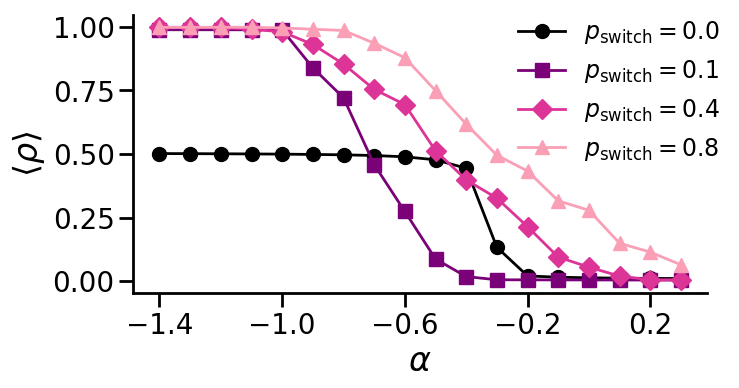

In [7]:
def figure4a(overlap):

	fig, ax = plt.subplots(1,1, figsize=(7.5,4))

	new_perror_list = [0.0, 0.1, 0.4, 0.8]
	markers = ['o', 's', 'D', '^']
	colors = ['black', '#7a0177', '#dd3497', '#fa9fb5']

	a_list = [np.round(Wh-Gh, 2) for Gh in Gh_list]

	for ind, p_error in enumerate(new_perror_list):

		plot_dat = []

		for Gh in Gh_list:

			dat = np.load(dat_path + f"/RR-averaged_coop_N_{num_plrs}_kp_{kp}_kh_{kh}_overlap_{overlap}_Rp_{Rp}_Sp_{Sp}_Tp_{Tp}_Pp_{Pp}_Gh_{Gh}_Wh_{Wh}_wf_{wf}_rho_pi_{rho_pi}_rho_hi_{rho_hi}_p_error_{p_error}.npy")

			coop_level = 0.5*np.mean(dat[0,:]+dat[1,:])/num_plrs
			plot_dat.append(coop_level)

		ax.plot(a_list, plot_dat, label=rf"$p_{{\text{{switch}}}} = {p_error}$", linewidth=2, marker=markers[ind], markersize=10, color = colors[ind])

	ax.set_xlabel(r"$\alpha$", fontsize=text_font+4)
	ax.set_ylabel(r"$\langle \rho \rangle$", fontsize=text_font+4)

	ax.xaxis.set_ticks(np.arange(min(a_list), max(a_list), 0.4))

	ax.legend(fontsize=text_font-3, loc='upper right', frameon=False, bbox_to_anchor=(0.96, 0.96, 0.1, 0.1))

	axis_decor(ax, text_font, 10, 5, 2)

	plt.tight_layout()
	plt.savefig(fig_path + f"/fig4a_v4_a_trend_p_switch_overlap_{overlap}.png", dpi=300, format='png', bbox_inches='tight')
	plt.show()



figure4a(overlap=0.5)

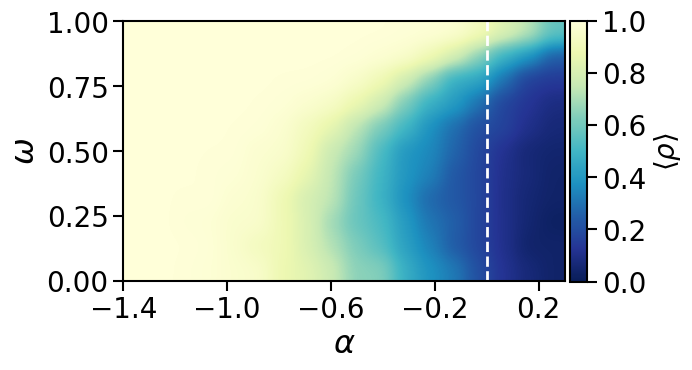

In [8]:
def figure4b(p_error, colormap):

	fig, ax = plt.subplots(1,1, figsize=(7,4))

	a_list = [np.round(Wh-Gh, 2) for Gh in Gh_list]

	plot_dat = np.zeros((len(overlap_list), (len(Gh_list))))

	for g, Gh in enumerate(Gh_list):
		for o, overlap in enumerate(overlap_list):

			dat = np.load(dat_path + f"/RR-averaged_coop_N_{num_plrs}_kp_{kp}_kh_{kh}_overlap_{overlap}_Rp_{Rp}_Sp_{Sp}_Tp_{Tp}_Pp_{Pp}_Gh_{Gh}_Wh_{Wh}_wf_{wf}_rho_pi_{rho_pi}_rho_hi_{rho_hi}_p_error_{p_error}.npy")

			coop_level = 0.5*np.mean(dat[0,:]+dat[1,:])/num_plrs

			plot_dat[o,len(a_list)-1-g] = coop_level

	ax.imshow(plot_dat, cmap=colormap, origin='lower', 
			extent=[min(a_list), max(a_list), min(overlap_list), max(overlap_list)], 
			vmin=0, vmax=1, interpolation='gaussian')


	ax.vlines(0.0, 0, 1, color='white', linestyle='--', linewidth=2)

	linewidth = 1.5
	major_length = 7
	minor_length = 1

	ax.set_xlabel(r"$\alpha$", fontsize=text_font+3)
	ax.set_ylabel(r"$\omega$", fontsize=text_font+3)


	cbar = fig.colorbar(ScalarMappable(norm=Normalize(0,1), cmap=colormap), ax=ax, aspect=15, pad=0.01, shrink=0.84)
	cbar.set_ticks(np.arange(0,1.1, 0.2))

	cbar.ax.set_ylabel(r"$\langle \rho \rangle$", fontsize=text_font)
	cbar.ax.tick_params(labelsize=text_font, length=major_length, width=linewidth)
	cbar.outline.set_linewidth(linewidth)


	ax.tick_params(axis='both', which='major', labelsize=text_font, length=major_length, width=linewidth)
	ax.tick_params(axis='both', which='minor', labelsize=text_font, length=major_length, width=linewidth)
	ax.xaxis.set_ticks(np.arange(min(a_list), max(a_list), 0.4))


	for axis in ['top','bottom','left','right']:
		ax.spines[axis].set_linewidth(linewidth)



	plt.tight_layout()
	plt.savefig(f"{fig_path}/fig4b_v4_cooperation_heatmap.png", dpi=300, bbox_inches='tight', format='png')
	plt.show()

figure4b(p_error = 0.7, colormap = 'YlGnBu_r')